In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('..\\ML\\13_kmeans\\income.csv')

In [13]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [4]:
scale = MinMaxScaler()

In [8]:
df['Age'] = scale.fit_transform(df[['Age']])

In [10]:
df['Income($)'] = scale.fit_transform(df[['Income($)']])

In [12]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [17]:
model = KMeans(n_clusters=3)

In [19]:
y_pred = model.fit_predict(df[['Age','Income($)']])

In [20]:
df['cluster'] = y_pred

In [22]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


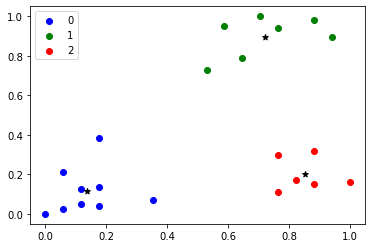

In [37]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'], df0['Income($)'], color='blue')
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*',color='black')

plt.legend(['0','1','2'])

In [35]:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [38]:
model.inertia_

0.4750783498553097

In [51]:
kval = range(1,10)
sse = []

In [54]:
for i in kval:
    model=KMeans(n_clusters=i)
    model.fit_predict(df[['Age', 'Income($)']])
    sse.append(model.inertia_)

In [55]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21578607765873023,
 0.1685851223602976,
 0.13943875937229083,
 0.10497488680620906]

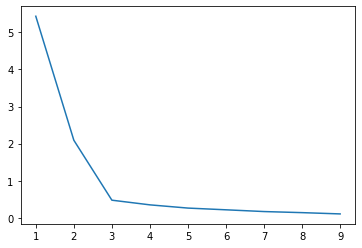

In [56]:
plt.plot(kval, sse)

In [57]:
from sklearn import datasets

In [62]:
iris = datasets.load_iris()

In [64]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [65]:
df1 = pd.DataFrame(iris.data, columns=iris.feature_names)

In [66]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [67]:
df1['target'] = iris.target

In [68]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [69]:
df1['flower_name'] = df1['target'].apply(lambda x : iris.target_names[x])

In [70]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [81]:
df1 = df1.drop(['sepal length (cm)','sepal width (cm)'], axis=1)

In [82]:
df1

,petal length (cm),petal width (cm),target,flower_name
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa
...,...,...,...,...
145,5.2,2.3,2,virginica
146,5.0,1.9,2,virginica
147,5.2,2.0,2,virginica
148,5.4,2.3,2,virginica


In [86]:
df1['petal length(cm)'] = scale.fit_transform(df1[['petal length (cm)']])

In [88]:
df1['petal width(cm)'] = scale.fit_transform(df1[['petal width (cm)']])

In [91]:
df1.drop(['petal length (cm)','petal width (cm)'],axis=1,inplace=True)

In [92]:
df1

,target,flower_name,petal length(cm),petal width(cm)
0,0,setosa,0.067797,0.041667
1,0,setosa,0.067797,0.041667
2,0,setosa,0.050847,0.041667
3,0,setosa,0.084746,0.041667
4,0,setosa,0.067797,0.041667
...,...,...,...,...
145,2,virginica,0.711864,0.916667
146,2,virginica,0.677966,0.750000
147,2,virginica,0.711864,0.791667
148,2,virginica,0.745763,0.916667


In [93]:
kval

range(1, 10)

In [95]:
new_sse = []

In [97]:
for i in kval:
    model = KMeans(n_clusters = i)
    model.fit_predict(df1[['petal length(cm)','petal length(cm)']])
    new_sse.append(model.inertia_)

In [98]:
new_sse

[26.677701809824736,
 3.8841557846576666,
 1.4284917000411193,
 0.7226378116122444,
 0.5017442326535719,
 0.3424289859830622,
 0.243841661379975,
 0.19644890683385371,
 0.14614437774294964]

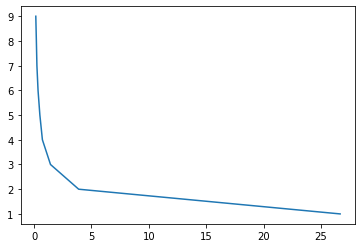

In [99]:
plt.plot(new_sse, kval)

In [101]:
model = KMeans(n_clusters=4)
new_target = model.fit_predict(df1[['petal length(cm)','petal width(cm)']])

In [118]:
df1['new_target'] = new_target

ValueError: Length of values does not match length of index

In [117]:
df1

,target,flower_name,petal length(cm),petal width(cm),new_target
52,1,versicolor,0.661017,0.583333,0
56,1,versicolor,0.627119,0.625000,0
70,1,versicolor,0.644068,0.708333,0
72,1,versicolor,0.661017,0.583333,0
77,1,versicolor,0.677966,0.666667,0
83,1,versicolor,0.694915,0.625000,0
85,1,versicolor,0.593220,0.625000,0
86,1,versicolor,0.627119,0.583333,0
101,2,virginica,0.694915,0.750000,0
103,2,virginica,0.779661,0.708333,0


In [113]:
df1 = df1[df1.new_target==0]
df2 = df1[df1.new_target==1]
df3 = df1[df1.new_target==2]


In [116]:
df1[df1['new_target'] == 1]

,target,flower_name,petal length(cm),petal width(cm),new_target


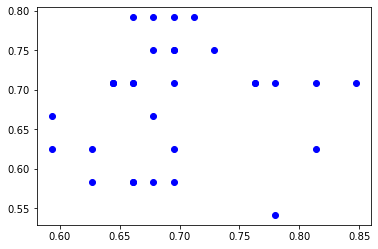

In [114]:
plt.scatter(df1['petal length(cm)'],df1['petal width(cm)'],color='blue')
plt.scatter(df2['petal length(cm)'],df2['petal width(cm)'],color='green')
plt.scatter(df3['petal length(cm)'],df3['petal width(cm)'],color='yellow')